<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Ethereum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import yfinance
import yfinance as yf


In [3]:
# Ethereum prediction

In [4]:
# Bringing data from yfinance to dataframe - Ethereum
df = yf.download('ETH-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
# Bringing data into csv file
df.to_csv('ethereum_data.csv', encoding='utf-8', index=True)

In [6]:
# Checking data in dataframe
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01 00:00:00+00:00,1586.488159,1644.727539,1566.857300,1641.792725,1641.792725,8116969489
2023-02-02 00:00:00+00:00,1641.365967,1704.458130,1641.322632,1643.241577,1643.241577,10558081069
2023-02-03 00:00:00+00:00,1642.904663,1670.696899,1634.223389,1664.745605,1664.745605,8169519805
2023-02-04 00:00:00+00:00,1664.472290,1690.099609,1648.189209,1667.059204,1667.059204,5843302512
2023-02-06 00:00:00+00:00,1631.659058,1640.343628,1631.659058,1633.611450,1633.611450,6852237312


In [7]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

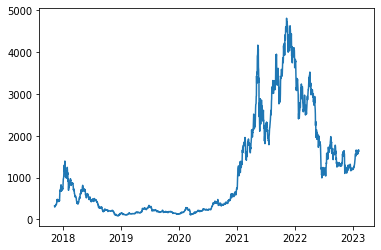

In [8]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [9]:
# length of dataframe
len(df)

1915

In [10]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [11]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[320.8840026855469,
 299.25299072265625,
 314.6809997558594,
 307.9079895019531,
 316.71600341796875,
 337.6310119628906,
 333.35699462890625,
 330.92401123046875,
 332.3940124511719,
 347.61199951171875,
 354.385986328125,
 366.7300109863281,
 360.4010009765625,
 380.6520080566406,
 410.1659851074219,
 474.9110107421875,
 466.2760009765625,
 471.3299865722656,
 480.3550109863281,
 472.9020080566406,
 427.52301025390625,
 447.114013671875,
 466.5400085449219,
 463.4490051269531,
 465.8529968261719,
 470.2040100097656,
 463.281005859375,
 428.5880126953125,
 434.4079895019531,
 456.031005859375,
 473.50201416015625,
 441.72100830078125,
 515.135986328125,
 651.4310302734375,
 702.7670288085938,
 695.8159790039062,
 684.447998046875,
 696.208984375,
 719.9749755859375,
 794.64501953125,
 826.822998046875,
 819.0859985351562,
 821.06298828125,
 674.8599853515625,
 719.3870239257812,
 694.1480102539062,
 765.833984375,
 773.8359985351562,
 762.8419799804688,
 737.0230102539062,
 753.591979

In [12]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[3095.825927734375,
 3001.1201171875,
 2557.931640625,
 2405.18115234375,
 2535.0390625,
 2440.352294921875,
 2455.93505859375,
 2468.0302734375,
 2423.001220703125,
 2547.092041015625,
 2597.084716796875,
 2603.466552734375,
 2688.27880859375,
 2792.1171875,
 2682.85400390625,
 2679.16259765625,
 2983.5869140625,
 3014.648193359375,
 3057.47607421875,
 3142.470703125,
 3122.608642578125,
 3239.45703125,
 3077.482177734375,
 2927.383544921875,
 2917.36279296875,
 2883.46337890625,
 2933.47900390625,
 3179.877197265625,
 3127.830078125,
 2881.48193359375,
 2785.7275390625,
 2763.701171875,
 2628.6484375,
 2573.816162109375,
 2639.29931640625,
 2590.359619140625,
 2598.067138671875,
 2764.53564453125,
 2781.11181640625,
 2621.8017578125,
 2919.201171875,
 2972.485107421875,
 2950.118408203125,
 2834.468994140625,
 2617.156005859375,
 2664.8310546875,
 2555.037353515625,
 2497.771240234375,
 2576.74755859375,
 2729.783447265625,
 2608.048583984375,
 2559.56298828125,
 2574.754150390625,
 

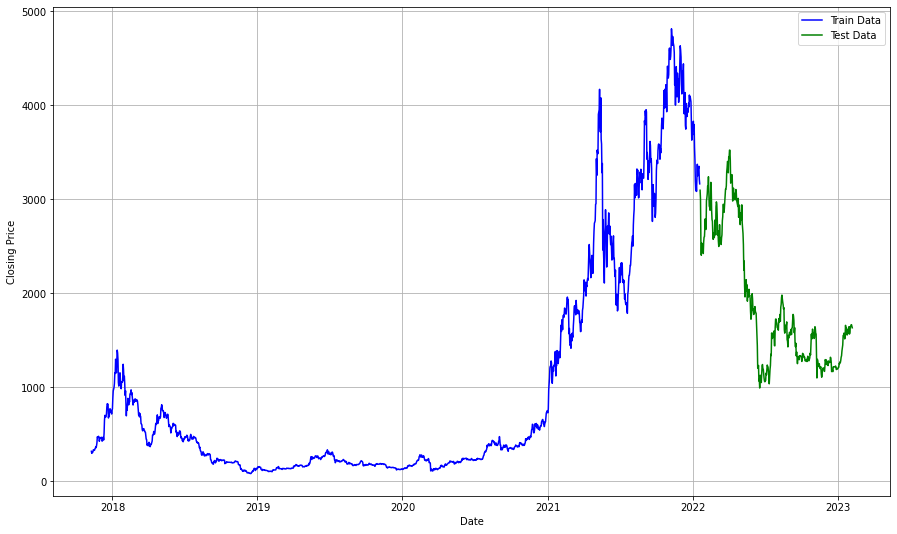

In [13]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [14]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [15]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [16]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1913
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -11054.433
Method:                       css-mle   S.D. of innovations             78.229
Date:                Mon, 06 Feb 2023   AIC                          22120.866
Time:                        02:03:59   BIC                          22154.204
Sample:                             1   HQIC                         22133.135
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7058      1.823      0.387      0.699      -2.868       4.280
ar.L1.D.y     -0.0641      0.023     -2.805      0.005      -0.109      -0.019
ar.L2.D.y      0.0119      0.023      0.521      0.6

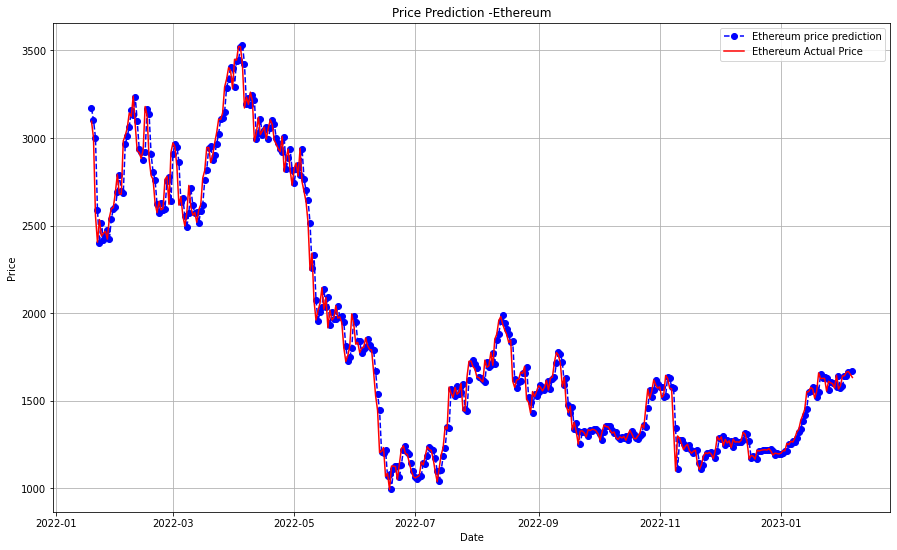

In [17]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Ethereum price prediction')
plt.plot(start_date, test, color ='red', label ='Ethereum Actual Price')
plt.title('Price Prediction -Ethereum')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.03184819410111938


MAPE of 3.2% implies the model is 96.8% accurate in predicting the test obeservations

In [19]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 1875.3223116802485
Mean Squared Error: 85.5260146221685


In [20]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 1637.258211804747
Prediction 2997.822762364408
Prediction 3025.3035194997424
Prediction 2643.6828615033623
Prediction 2483.6303072834335


In [21]:
# Converting list to dataframe 
Prediction = pd.DataFrame(prediction_next_5_days)

In [22]:
#Reviewing dataframe
Prediction

,0
0,1637.258212
1,2997.822762
2,3025.303519
3,2643.682862
4,2483.630307


In [23]:
#Converting dataframe to csv for visualization
Prediction.to_csv('Ethereum_prediction.csv', header='Prediction', index=True)

In [24]:
# Volatility

In [25]:
# Import Dependencies
import datetime
import time

[*********************100%***********************]  1 of 1 completed


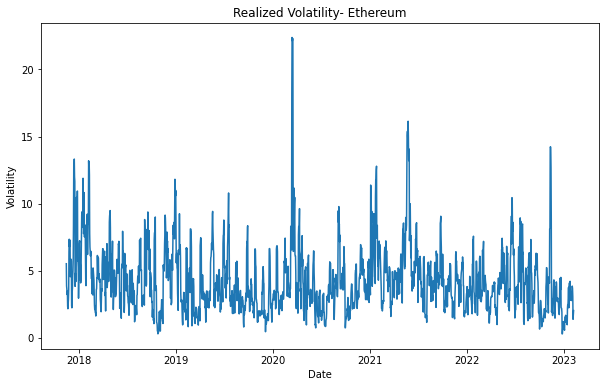

In [26]:
# Calculating the returns on Ethereum based on adjusted closing prices
start = "2014-09-7"
amzn = yf.download('ETH-USD', start=start,interval='1d')
ret = 100 * (amzn.pct_change()[1:]['Adj Close'])
realized_vol = ret.rolling(5).std()

# Plotting returns to see trends
plt.figure(figsize=(10, 6))
plt.plot(realized_vol.index,realized_vol)
plt.title('Realized Volatility- Ethereum')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

The code downloads historical daily data for the stock 'ETH-USD' from the start date specified and calculates the returns based on the adjusted closing prices. The returns are then plotted as a line graph to visualize the trend in the realized volatility over time. The graph shows the values of the 5-day rolling standard deviation of the returns calculated.

8/8 [==============================] - 0s 3ms/step
Root Mean Squared Error_1:0.005650
8/8 [==============================] - 0s 2ms/step
Root Mean Squared Error_2:0.004687
8/8 [==============================] - 0s 2ms/step
Root Mean Squared Error_3:0.004792
8/8 [==============================] - 0s 2ms/step
Root Mean Squared Error_4:0.004318


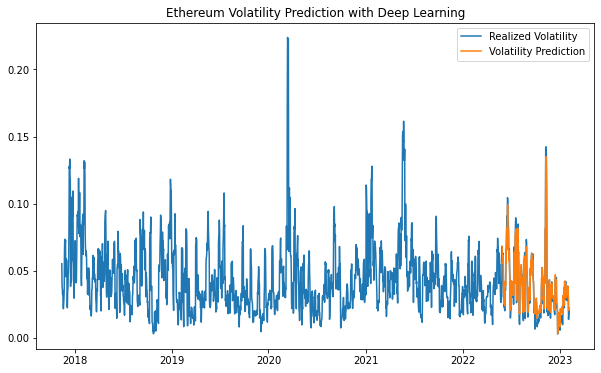

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error as mse
import matplotlib.dates as mdates

# Calculate the realized volatility using rolling standard deviation
realized_vol = ret.rolling(5).std()
realized_vol = pd.DataFrame(realized_vol)
realized_vol.reset_index(drop=True, inplace=True)

# Calculate the square of the returns
returns_squared = ret ** 2
returns_squared = returns_squared.reset_index()
returns_squared = returns_squared.drop('Date', axis=1)

# Concatenate the realized volatility and squared returns to form the input data
X = pd.concat([realized_vol, returns_squared], axis=1)
X = X.iloc[4:].copy()
X = X.reset_index()
X.drop('index', axis=1, inplace=True)

realized_vol = realized_vol.dropna().reset_index()
realized_vol.drop('index', axis=1, inplace=True)

# Configuring the network structure by deciding number of layers and neurons


model = keras.Sequential(
      [layers.Dense(256, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(1, activation="linear"),])

# Compiling the model with loss and optimizer
model.compile(loss='mse', optimizer='rmsprop')
# Number of trading days
n = 252
# Deciding the epoch and batch size using np.arange
epochs_trial = np.arange(100, 400, 4)
batch_trial = np.arange(100, 400, 4)
pred = []
RMSE = []
for i, j, k in zip(range(4), epochs_trial, batch_trial):
  model.fit(X.iloc[:-n].values,
      realized_vol.iloc[1:-(n-1)].values.reshape(-1,),
      # Fitting the deep learning model
      batch_size=k, epochs=j, verbose=False)
  # Predicting the volatility based on the weights obtained from the training phase
  predict = model.predict(np.asarray(X.iloc[-n:]))
  RMSE.append(np.sqrt(mse(realized_vol.iloc[-n:] / 100,
      # Calculating the RMSE score by flattening the predictions                       
      predict.flatten() / 100)))
  pred.append(predict)
  print('Root Mean Squared Error_{}:{:.6f}'.format(i+1, RMSE[i]))
        

predict = pd.DataFrame(pred[RMSE.index(min(RMSE))])
predict.index = ret.iloc[-n:].index

# Converting realized volatility index to datetime
realized_vol = ret.rolling(5).std()
realized_vol = pd.DataFrame(realized_vol)

# Plotting volatility prediction
plt.figure(figsize=(10, 6))
#plt.plot(convert_to_date (realized_vol) /100,label='Realized Volatility')
plt.plot(realized_vol /100,label='Realized Volatility')
plt.plot(predict / 100,label='Volatility Prediction')
plt.title('Ethereum Volatility Prediction with Deep Learning',  fontsize=12)
plt.legend()
plt.show()

This code imports the required libraries and then calculates the realized volatility of Ethereum's stock prices. It then calculates the squared returns of the stock prices. The realized volatility and the squared returns are concatenated to form the input data. Then, a deep learning model is built using the TensorFlow library and its Keras API. The model is a sequential neural network consisting of 3 dense layers. The first and second layers have 256 and 128 neurons, respectively, with a ReLU activation function. The final layer has 1 neuron with a linear activation function. The model is then compiled using the mean squared error loss function and the RMSprop optimizer. The code then fits the model to the input data and predicts the volatility of Ethereum's stock prices. The Root Mean Squared Error (RMSE) is then calculated for the predictions. The code then plots the realized volatility and the predicted volatility to visualize the results.